In [1]:
import glob
from collections import Counter
import calendar

import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
from scipy.stats import genextreme as gev

from unseen import fileio
from unseen import independence
from unseen import bias_correction
from unseen import similarity
from unseen import general_utils
from unseen import stability
from unseen import moments

Matplotlib is building the font cache; this may take a moment.


In [22]:
from importlib import reload

In [23]:
reload(stability)

<module 'unseen.stability' from '/home/599/dbi599/unseen/unseen/stability.py'>

## Obs

In [2]:
agcd_files = glob.glob('/g/data/zv2/agcd/v1-0-1/precip/total/r005/01day/agcd_v1-0-1_precip_total_r005_daily_*.nc')
agcd_files.sort()
agcd_files

['/g/data/zv2/agcd/v1-0-1/precip/total/r005/01day/agcd_v1-0-1_precip_total_r005_daily_1900.nc',
 '/g/data/zv2/agcd/v1-0-1/precip/total/r005/01day/agcd_v1-0-1_precip_total_r005_daily_1901.nc',
 '/g/data/zv2/agcd/v1-0-1/precip/total/r005/01day/agcd_v1-0-1_precip_total_r005_daily_1902.nc',
 '/g/data/zv2/agcd/v1-0-1/precip/total/r005/01day/agcd_v1-0-1_precip_total_r005_daily_1903.nc',
 '/g/data/zv2/agcd/v1-0-1/precip/total/r005/01day/agcd_v1-0-1_precip_total_r005_daily_1904.nc',
 '/g/data/zv2/agcd/v1-0-1/precip/total/r005/01day/agcd_v1-0-1_precip_total_r005_daily_1905.nc',
 '/g/data/zv2/agcd/v1-0-1/precip/total/r005/01day/agcd_v1-0-1_precip_total_r005_daily_1906.nc',
 '/g/data/zv2/agcd/v1-0-1/precip/total/r005/01day/agcd_v1-0-1_precip_total_r005_daily_1907.nc',
 '/g/data/zv2/agcd/v1-0-1/precip/total/r005/01day/agcd_v1-0-1_precip_total_r005_daily_1908.nc',
 '/g/data/zv2/agcd/v1-0-1/precip/total/r005/01day/agcd_v1-0-1_precip_total_r005_daily_1909.nc',
 '/g/data/zv2/agcd/v1-0-1/precip/total/r

In [3]:
agcd_ds = fileio.open_dataset(
    agcd_files,
    variables=['pr'],
    point_selection=[-42.9, 147.3],
    rolling_sum_window=5,
    time_freq='A-DEC',
    time_agg='max',
    time_agg_dates=True,
    input_freq='D',
    metadata_file='../../config/dataset_agcd_daily.yml',
    units={'pr': 'mm day-1'},
)

/home/599/dbi599/unseen/unseen/time_utils.py:37: FutureWarning: Following pandas, the `loffset` parameter to resample will be deprecated in a future version of xarray.  Switch to using time offset arithmetic.
  ds_arg = ds.resample(


In [4]:
print(agcd_ds)

<xarray.Dataset>
Dimensions:     (time: 123)
Coordinates:
  * time        (time) object 1900-12-31 00:00:00 ... 2022-12-31 00:00:00
Data variables:
    pr          (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    event_time  (time) <U28 '1900-04-17' '1901-04-25' ... '2022-05-08'
Attributes: (12/33)
    geospatial_lat_min:        -44.525
    geospatial_lat_max:        -9.975
    geospatial_lon_min:        111.975
    geospatial_lon_max:        156.275
    time_coverage_start:       1899-12-31T09:00:00
    date_created:              2017-01-17T22:13:51.976225
    ...                        ...
    licence:                   Data Licence: The grid data files in this AGCD...
    description:               This AGCD data is a snapshot of the operationa...
    date_issued:               2023-05-19 06:19:17
    attribution:               Data should be cited as : Australian Bureau of...
    copyright:                 (C) Copyright Commonwealth of Australia 2023, ...
    history:

In [5]:
agcd_ds = agcd_ds.compute()

In [6]:
agcd_ds['event_time']

<xarray.DataArray 'event_time' (time: 123)>
array(['1900-04-17', '1901-04-25', '1902-02-28', '1903-06-10',
       '1904-02-29', '1905-05-31', '1906-10-05', '1907-12-30',
       '1908-10-10', '1909-04-23', '1910-09-30', '1911-03-14',
       '1912-09-19', '1913-04-27', '1914-12-30', '1915-04-14',
       '1916-12-15', '1917-04-08', '1918-08-26', '1919-03-09',
       '1920-12-18', '1921-07-19', '1922-07-19', '1923-11-09',
       '1924-02-20', '1925-05-15', '1926-06-29', '1927-02-23',
       '1928-04-29', '1929-04-06', '1930-11-29', '1931-10-05',
       '1932-03-14', '1933-10-06', '1934-12-31', '1935-04-19',
       '1936-12-23', '1937-10-19', '1938-03-18', '1939-06-05',
       '1940-10-28', '1941-12-08', '1942-05-31', '1943-11-07',
       '1944-01-07', '1945-02-03', '1946-03-29', '1947-12-23',
       '1948-05-31', '1949-01-18', '1950-06-02', '1951-04-15',
       '1952-10-13', '1953-09-24', '1954-06-08', '1955-06-27',
       '1956-05-07', '1957-09-19', '1958-08-20', '1959-09-22',
       '1960-04-24', '1961-04-27', '1962-09-29', '1963-07-13',
       '1964-02-13', '1965-04-23', '1966-09-08', '1967-07-12',
       '1968-08-06', '1969-12-15', '1970-01-06', '1971-01-01',
       '1972-12-26', '1973-05-05', '1974-07-11', '1975-08-30',
       '1976-08-06', '1977-03-29', '1978-08-11', '1979-09-16',
       '1980-07-01', '1981-06-05', '1982-03-30', '1983-09-10',
       '1984-08-14', '1985-12-20', '1986-01-13', '1987-05-28',
       '1988-05-19', '1989-10-31', '1990-07-06', '1991-12-19',
       '1992-07-06', '1993-12-30', '1994-01-01', '1995-12-22',
       '1996-04-21', '1997-01-25', '1998-12-29', '1999-02-09',
       '2000-08-25', '2001-08-21', '2002-01-12', '2003-03-24',
       '2004-02-01', '2005-02-06', '2006-05-04', '2007-01-22',
       '2008-11-24', '2009-06-07', '2010-08-15', '2011-04-15',
       '2012-05-28', '2013-07-24', '2014-08-02', '2015-01-18',
       '2016-06-09', '2017-12-05', '2018-05-14', '2019-08-25',
       '2020-06-25', '2021-03-28', '2022-05-08'], dtype='<U28')
Coordinates:
  * time     (time) object 1900-12-31 00:00:00 ... 2022-12-31 00:00:00

In [7]:
years = agcd_ds['time'].dt.year.values
agcd_df = pd.DataFrame(index=years)
agcd_df['pr'] = agcd_ds['pr'].values
agcd_df['event_time'] = agcd_ds['event_time'].values

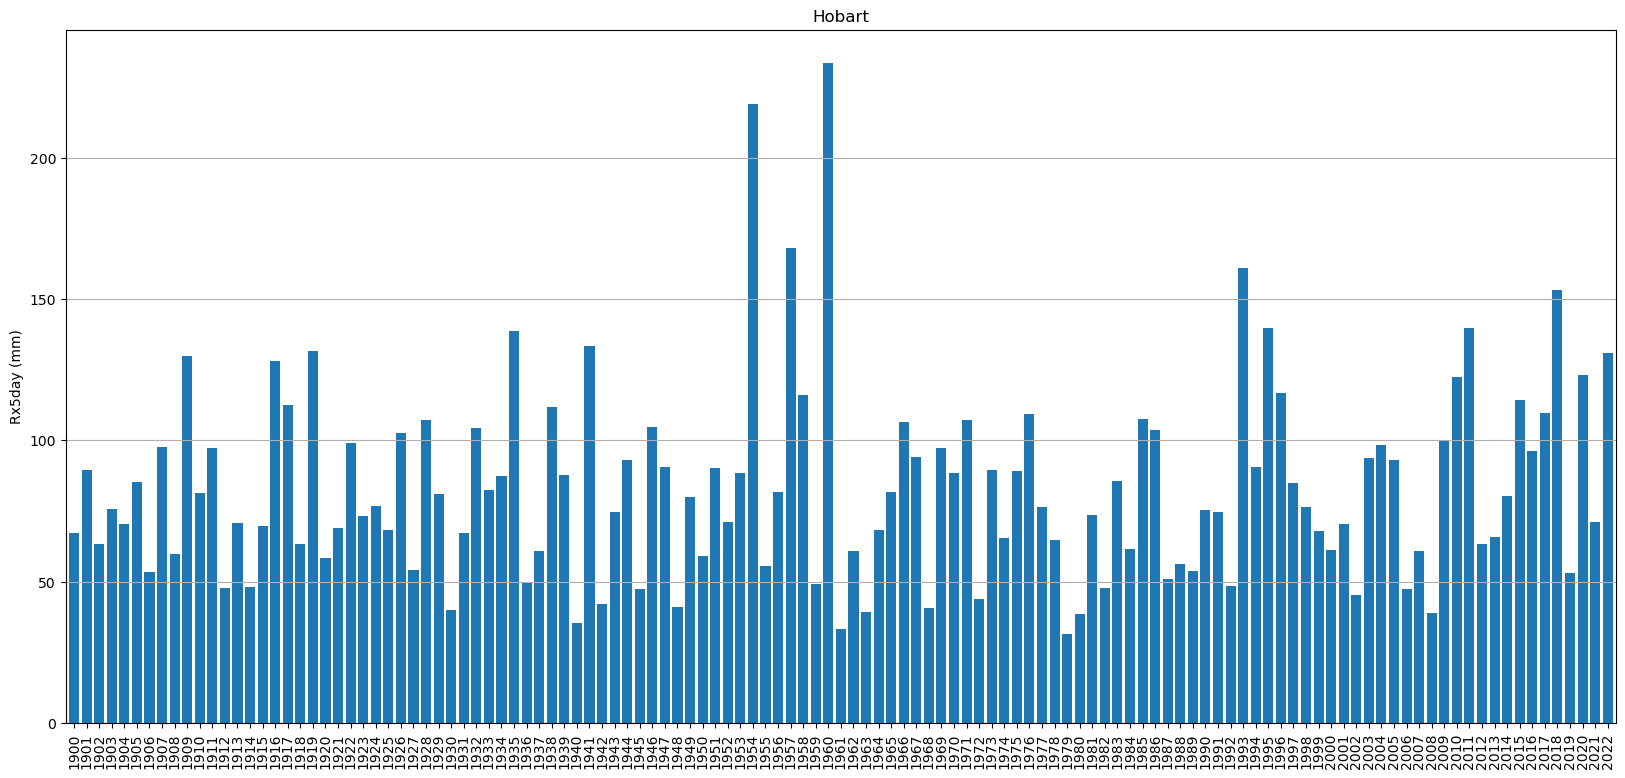

In [8]:
agcd_df['pr'].plot.bar(figsize=[20, 9], width=0.8)
#plt.axhline(mean_rainfall, color='0.5', linestyle='--')
plt.ylabel('Rx5day (mm)')
plt.title('Hobart')
plt.grid(axis='y')

plt.savefig(
    'observational_record.png',
    bbox_inches='tight',
    facecolor='white',
    dpi=200
)

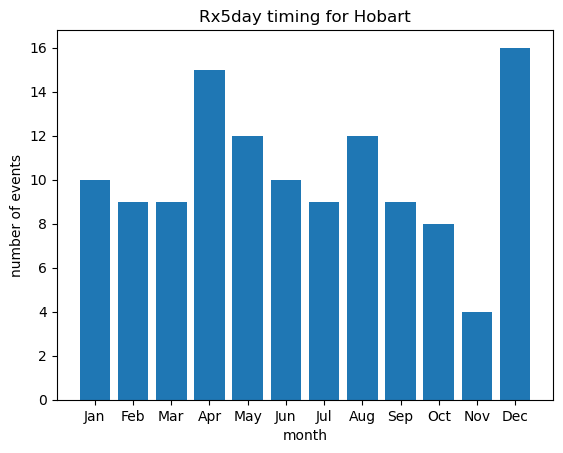

In [9]:
event_months = [int(date[5:7]) for date in agcd_ds['event_time'].values]
month_counts = Counter(event_months)
months = np.arange(1, 13)
counts = [month_counts[month] for month in months]

plt.bar(months, counts)
plt.title('Rx5day timing for Hobart', fontsize='large')
plt.ylabel('number of events')
plt.xlabel('month')
xlabels = [calendar.month_abbr[i] for i in months]
plt.xticks(months, xlabels, fontsize='medium')
plt.savefig(
    'seasonality.png',
    bbox_inches='tight',
    facecolor='white',
    dpi=200
)
plt.show()

In [10]:
ranked_years = agcd_df.sort_values(by='pr', ascending=False)
print(ranked_years.head(n=10))

              pr  event_time
1960  233.678711  1960-04-24
1954  218.961914  1954-06-08
1957  168.168945  1957-09-19
1993  160.882812  1993-12-30
2018  153.111328  2018-05-14
2011  139.841797  2011-04-15
1995  139.805664  1995-12-22
1935  138.672852  1935-04-19
1941  133.274414  1941-12-08
1919  131.631836  1919-03-09


In [11]:
rx5day_max = ranked_years.iloc[0]['pr']
print(rx5day_max)

233.67871


The event 20-24 April 1960: http://www.bom.gov.au/tas/flood/flood_history/flood_history.shtml#yr1960_1969

In [14]:
agcd_shape, agcd_loc, agcd_scale = general_utils.fit_gev(agcd_ds['pr'].values)

In [15]:
event_probability = gev.sf(rx5day_max, agcd_shape, loc=agcd_loc, scale=agcd_scale)
event_return_period = 1. / event_probability
event_percentile = (1 - event_probability) * 100

print(f'{event_return_period:.0f} year return period')
print(f'{event_percentile:.2f}% percentile\n')

297 year return period
99.66% percentile



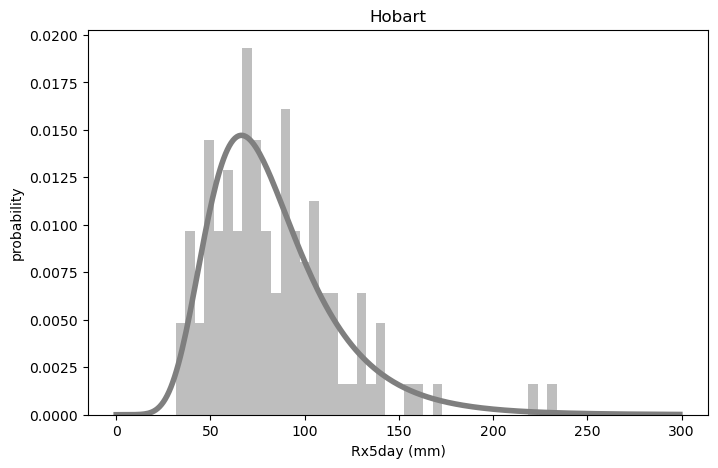

In [16]:
fig, ax = plt.subplots(figsize=[8, 5])
xvals = np.arange(0, 300)
agcd_ds['pr'].plot.hist(bins=40, density=True, color='tab:gray', alpha=0.5)
agcd_pdf = gev.pdf(xvals, agcd_shape, agcd_loc, agcd_scale)
plt.plot(xvals, agcd_pdf, color='tab:gray', linewidth=4.0)
plt.xlabel('Rx5day (mm)')
plt.ylabel('probability')
plt.title('Hobart')
plt.show()

## Model

In [23]:
#model_ds = fileio.open_mfforecast(
#    '/home/599/dbi599/east-coast-rain/file_lists/CanESM5_dcppA-hindcast_pr_files.txt',
#    n_ensemble_files=20,
#    variables=['pr'],
#    point_selection=[-42.9, 147.3],
#    rolling_sum_window=5,
#    time_freq='A-DEC',
#    time_agg='max',
#    time_agg_dates=True,
#    input_freq='D',
#    units={'pr': 'mm day-1'},
#    reset_times=True,
#    complete_time_agg_periods=True,
#)

In [ ]:
#print(model_ds)

In [ ]:
# /g/data/xv83/dbi599/miniconda3/envs/unseen2/bin/fileio /home/599/dbi599/east-coast-rain/file_lists/CanESM5_dcppA-hindcast_pr_files.txt /g/data/xv83/dbi599/unseen/Rx5day_CanESM5_dcppA-hindcast_s1960-2016_gn_hobart.zarr.zip --n_ensemble_files 20 --variables pr --time_freq A-DEC --time_agg max --input_freq D --point_selection -42.9 147.3 --reset_times --complete_time_agg_periods --units pr='mm day-1' --forecast -v

In [17]:
model_ds = xr.open_dataset('/g/data/xv83/dbi599/unseen/Rx5day_CanESM5_dcppA-hindcast_s1960-2016_gn_hobart.zarr.zip', engine='zarr')

In [19]:
model_ds = model_ds.compute()

In [20]:
model_ds

<xarray.Dataset>
Dimensions:    (ensemble: 20, init_date: 57, lead_time: 10)
Coordinates:
  * ensemble   (ensemble) int64 0 1 2 3 4 5 6 7 8 ... 11 12 13 14 15 16 17 18 19
  * init_date  (init_date) object 1961-01-01 00:00:00 ... 2017-01-01 00:00:00
  * lead_time  (lead_time) int64 0 1 2 3 4 5 6 7 8 9
    time       (lead_time, init_date) object 1961-01-01 12:00:00 ... 2026-01-...
Data variables:
    pr         (init_date, ensemble, lead_time) float32 46.37 19.65 ... 57.24
Attributes: (12/53)
    CCCma_model_hash:            Unknown
    CCCma_parent_runid:          d2a-asm-e01
    CCCma_pycmor_hash:           13db8596c37129e414cad7ae31f2927ca8f5dd39
    CCCma_runid:                 d2a196101e01
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   1961:01:01:00
    ...                          ...
    table_info:                  Creation Date:(20 February 2019) MD5:374fbe5...
    title:                       CanESM5 output prepared for CMIP6
    tracking_id:                 hdl:21.14100/f220e01c-1214-4625-be6a-c0475c2...
    variable_id:                 pr
    variant_label:               r1i1p2f1
    version:                     v20190429

## Stability and stationarity

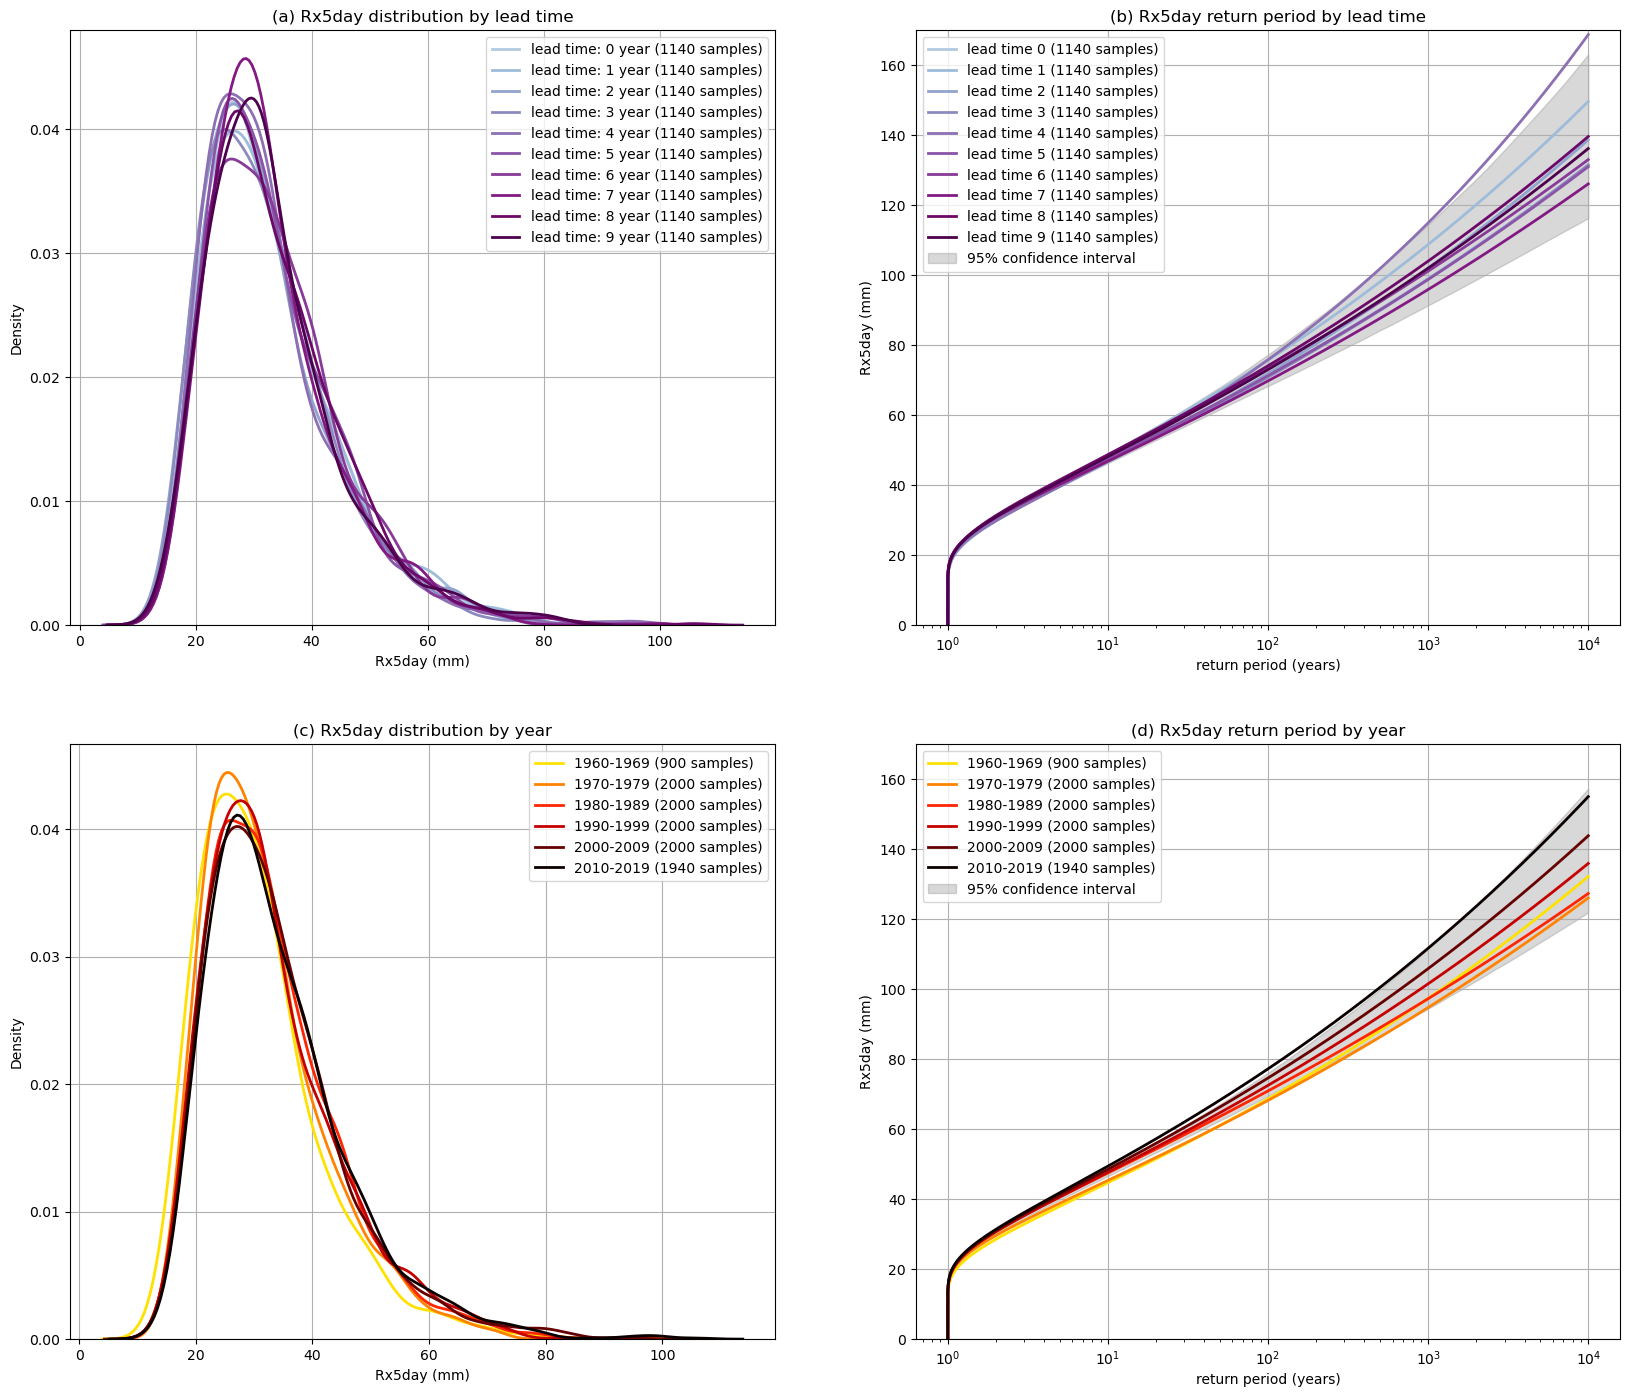

In [26]:
stability.create_plot(
    model_ds['pr'],
    'Rx5day',
    [1960, 1970, 1980, 1990, 2000, 2010],
    outfile='stability_CanESM5.png',
    uncertainty=True,
    return_method='gev',
    units='Rx5day (mm)',
    ylim=(0, 170),
)

## Independence testing

In [27]:
mean_correlations, null_correlation_bounds = independence.run_tests(model_ds['pr'])

/home/599/dbi599/unseen/unseen/independence.py:261: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'sample' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  ds_random_sample = ds_random_sample.assign_coords({"sample": index}).unstack()
/home/599/dbi599/unseen/unseen/independence.py:261: FutureWarning: updating coordinate 'sample' with a PandasMultiIndex would leave the multi-index level coordinates ['init_date', 'lead_time', 'ensemble'] in an inconsistent state. This will raise an error in the future. Use

/home/599/dbi599/unseen/unseen/independence.py:261: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'sample' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  ds_random_sample = ds_random_sample.assign_coords({"sample": index}).unstack()
/home/599/dbi599/unseen/unseen/independence.py:261: FutureWarning: updating coordinate 'sample' with a PandasMultiIndex would leave the multi-index level coordinates ['init_date', 'lead_time', 'ensemble'] in an inconsistent state. This will raise an error in the future. Use

/home/599/dbi599/unseen/unseen/independence.py:261: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'sample' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  ds_random_sample = ds_random_sample.assign_coords({"sample": index}).unstack()
/home/599/dbi599/unseen/unseen/independence.py:261: FutureWarning: updating coordinate 'sample' with a PandasMultiIndex would leave the multi-index level coordinates ['init_date', 'lead_time', 'ensemble'] in an inconsistent state. This will raise an error in the future. Use

/home/599/dbi599/unseen/unseen/independence.py:261: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'sample' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  ds_random_sample = ds_random_sample.assign_coords({"sample": index}).unstack()
/home/599/dbi599/unseen/unseen/independence.py:261: FutureWarning: updating coordinate 'sample' with a PandasMultiIndex would leave the multi-index level coordinates ['init_date', 'lead_time', 'ensemble'] in an inconsistent state. This will raise an error in the future. Use

/home/599/dbi599/unseen/unseen/independence.py:261: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'sample' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  ds_random_sample = ds_random_sample.assign_coords({"sample": index}).unstack()
/home/599/dbi599/unseen/unseen/independence.py:261: FutureWarning: updating coordinate 'sample' with a PandasMultiIndex would leave the multi-index level coordinates ['init_date', 'lead_time', 'ensemble'] in an inconsistent state. This will raise an error in the future. Use

/home/599/dbi599/unseen/unseen/independence.py:261: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'sample' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  ds_random_sample = ds_random_sample.assign_coords({"sample": index}).unstack()
/home/599/dbi599/unseen/unseen/independence.py:261: FutureWarning: updating coordinate 'sample' with a PandasMultiIndex would leave the multi-index level coordinates ['init_date', 'lead_time', 'ensemble'] in an inconsistent state. This will raise an error in the future. Use

/home/599/dbi599/unseen/unseen/independence.py:261: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'sample' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  ds_random_sample = ds_random_sample.assign_coords({"sample": index}).unstack()
/home/599/dbi599/unseen/unseen/independence.py:261: FutureWarning: updating coordinate 'sample' with a PandasMultiIndex would leave the multi-index level coordinates ['init_date', 'lead_time', 'ensemble'] in an inconsistent state. This will raise an error in the future. Use

/home/599/dbi599/unseen/unseen/independence.py:261: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'sample' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  ds_random_sample = ds_random_sample.assign_coords({"sample": index}).unstack()
/home/599/dbi599/unseen/unseen/independence.py:261: FutureWarning: updating coordinate 'sample' with a PandasMultiIndex would leave the multi-index level coordinates ['init_date', 'lead_time', 'ensemble'] in an inconsistent state. This will raise an error in the future. Use

/home/599/dbi599/unseen/unseen/independence.py:261: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'sample' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  ds_random_sample = ds_random_sample.assign_coords({"sample": index}).unstack()
/home/599/dbi599/unseen/unseen/independence.py:261: FutureWarning: updating coordinate 'sample' with a PandasMultiIndex would leave the multi-index level coordinates ['init_date', 'lead_time', 'ensemble'] in an inconsistent state. This will raise an error in the future. Use

/home/599/dbi599/unseen/unseen/independence.py:261: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'sample' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  ds_random_sample = ds_random_sample.assign_coords({"sample": index}).unstack()
/home/599/dbi599/unseen/unseen/independence.py:261: FutureWarning: updating coordinate 'sample' with a PandasMultiIndex would leave the multi-index level coordinates ['init_date', 'lead_time', 'ensemble'] in an inconsistent state. This will raise an error in the future. Use

In [28]:
print(mean_correlations)

{1: <xarray.DataArray (lead_time: 10)>
dask.array<mean_agg-aggregate, shape=(10,), dtype=float64, chunksize=(10,), chunktype=numpy.ndarray>
Coordinates:
  * lead_time  (lead_time) int64 0 1 2 3 4 5 6 7 8 9}


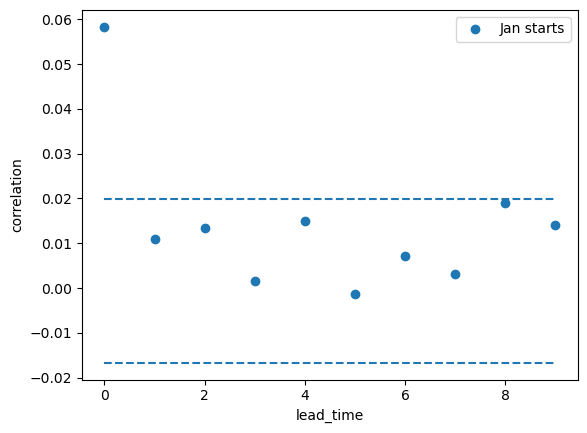

In [29]:
independence.create_plot(
    mean_correlations,
    null_correlation_bounds,
    'independence_CanESM5.png'
)

So we should drop the first two lead times (TODO: We need a function where we can drop a different number of lead times for each init date).

In [30]:
#cafe_da_indep = cafe_ds['pr'].dropna('lead_time').sel({'lead_time': slice(3, None)})
model_da_indep = model_ds['pr'].where(model_ds['lead_time'] > 0)
model_da_indep = model_da_indep.dropna('lead_time')

In [31]:
model_da_indep

<xarray.DataArray 'pr' (init_date: 57, ensemble: 20, lead_time: 9)>
array([[[19.646885, 23.586298, 44.679348, ..., 35.72815 , 22.395569,
         19.957357],
        [18.542671, 29.214334, 23.773235, ..., 36.04509 , 30.327402,
         21.76596 ],
        [24.202019, 31.247368, 23.774328, ..., 37.009407, 29.520227,
         33.509876],
        ...,
        [32.542812, 23.075092, 26.44709 , ..., 30.299263, 35.037186,
         28.324757],
        [22.2013  , 29.16861 , 18.628107, ..., 36.566956, 21.980082,
         26.497927],
        [64.49942 , 24.200891, 26.525434, ..., 29.038292, 27.356783,
         29.355106]],

       [[40.952198, 49.50399 , 37.655   , ..., 24.869122, 44.182137,
         37.36595 ],
        [42.61455 , 21.883722, 26.382406, ..., 18.748892, 26.23187 ,
         26.834942],
        [23.723057, 25.208557, 39.93954 , ..., 69.88151 , 27.502167,
         43.317772],
...
        [38.76069 , 57.43945 , 20.359365, ..., 19.87747 , 32.25545 ,
         31.676802],
        [28.055977, 25.599133, 21.376461, ..., 38.767796, 25.172749,
         21.726562],
        [24.369442, 44.748116, 20.949757, ..., 28.541977, 16.953625,
         28.786694]],

       [[38.862724, 35.034206, 41.503754, ..., 28.869627, 33.868164,
         18.36054 ],
        [27.62861 , 23.116955, 21.900068, ..., 35.254745, 32.813644,
         19.875605],
        [29.481066, 19.773212, 28.208776, ..., 20.393389, 51.429413,
         46.43913 ],
        ...,
        [22.894194, 26.283394, 18.93996 , ..., 52.502693, 29.007788,
         21.581997],
        [31.023558, 28.052902, 20.633629, ..., 30.001095, 30.102474,
         36.129   ],
        [36.828472, 35.92599 , 89.79362 , ..., 18.260023, 49.101105,
         57.23571 ]]], dtype=float32)
Coordinates:
  * ensemble   (ensemble) int64 0 1 2 3 4 5 6 7 8 ... 11 12 13 14 15 16 17 18 19
  * init_date  (init_date) object 1961-01-01 00:00:00 ... 2017-01-01 00:00:00
  * lead_time  (lead_time) int64 1 2 3 4 5 6 7 8 9
    time       (lead_time, init_date) object 1962-01-01 12:00:00 ... 2026-01-...
Attributes:
    standard_name:  lwe_precipitation_rate
    units:          mm d-1

## Bias correction

In [32]:
correction_method = 'multiplicative'
baseline_period = ['1970-01-01', '2017-12-31']

In [33]:
bias = bias_correction.get_bias(
    model_da_indep,
    agcd_ds['pr'],
    correction_method,
    time_rounding='A',
    time_period=baseline_period
)
print(bias)

<xarray.DataArray 'pr' (month: 1)>
array([0.40828174], dtype=float32)
Coordinates:
  * month    (month) int64 1
Attributes:
    standard_name:           lwe_precipitation_rate
    units:                   mm d-1
    climatological_period:   ['1970-01-01', '2017-12-31']
    bias_correction_method:  multiplicative
    bias_correction_period:  1970-01-01-2017-12-31


In [34]:
model_da_bc = bias_correction.remove_bias(model_da_indep, bias, correction_method)

In [35]:
model_da_bc = model_da_bc.compute()

## Similarity testing

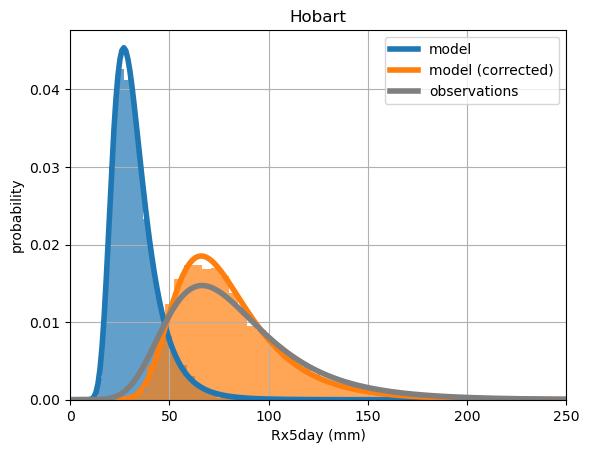

In [40]:
model_da_indep.plot.hist(bins=50, density=True, alpha=0.7, facecolor='tab:blue')
model_raw_shape, model_raw_loc, model_raw_scale = general_utils.fit_gev(model_da_indep.values, generate_estimates=True)
model_raw_pdf = gev.pdf(xvals, model_raw_shape, model_raw_loc, model_raw_scale)
plt.plot(xvals, model_raw_pdf, color='tab:blue', linewidth=4.0, label='model')

model_da_bc.plot.hist(bins=50, density=True, alpha=0.7, facecolor='tab:orange')
model_bc_shape, model_bc_loc, model_bc_scale = general_utils.fit_gev(model_da_bc.values, generate_estimates=True)
model_bc_pdf = gev.pdf(xvals, model_bc_shape, model_bc_loc, model_bc_scale)
plt.plot(xvals, model_bc_pdf, color='tab:orange', linewidth=4.0, label='model (corrected)')

agcd_ds['pr'].plot.hist(ax=ax, bins=50, density=True, facecolor='tab:gray', alpha=0.7)
plt.plot(xvals, agcd_pdf, color='tab:gray', linewidth=4.0, label='observations')

plt.xlabel('Rx5day (mm)')
plt.ylabel('probability')
plt.title('Hobart')
plt.xlim(0, 250)
plt.legend()
plt.grid()
plt.savefig(
    'precip_distribution_CanESM5.png',
    bbox_inches='tight',
    facecolor='white',
    dpi=200
)
plt.show()

INFO:root:mean: Obs = 83.49502563476562, Model 95% CI =30.967311763763426 to 34.8870132446289
INFO:root:standard deviation: Obs = 34.267822265625, Model 95% CI =9.348895239830018 to 13.448164391517638
INFO:root:skew: Obs = 1.4069650511166405, Model 95% CI =0.653033727051952 to 1.9503446111363119
INFO:root:kurtosis: Obs = 3.4493238193282894, Model 95% CI =-0.15929463340829808 to 6.592258283555126
INFO:root:GEV shape: Obs = -0.05232628138994108, Model 95% CI =-0.20831742633057976 to 0.04861497320340365
INFO:root:GEV location: Obs = 67.7079983493445, Model 95% CI =25.949042212995764 to 29.435391394319186
INFO:root:GEV scale: Obs = 25.03453176147036, Model 95% CI =6.786946117366526 to 9.29023620328193
INFO:root:mean: Obs = 83.49502563476562, Bias corrected model 95% CI =76.22427062988281 to 85.58113918304443
INFO:root:standard deviation: Obs = 34.267822265625, Bias corrected model 95% CI =22.623742866516114 to 32.97530574798584
INFO:root:skew: Obs = 1.4069650511166405, Bias corrected model

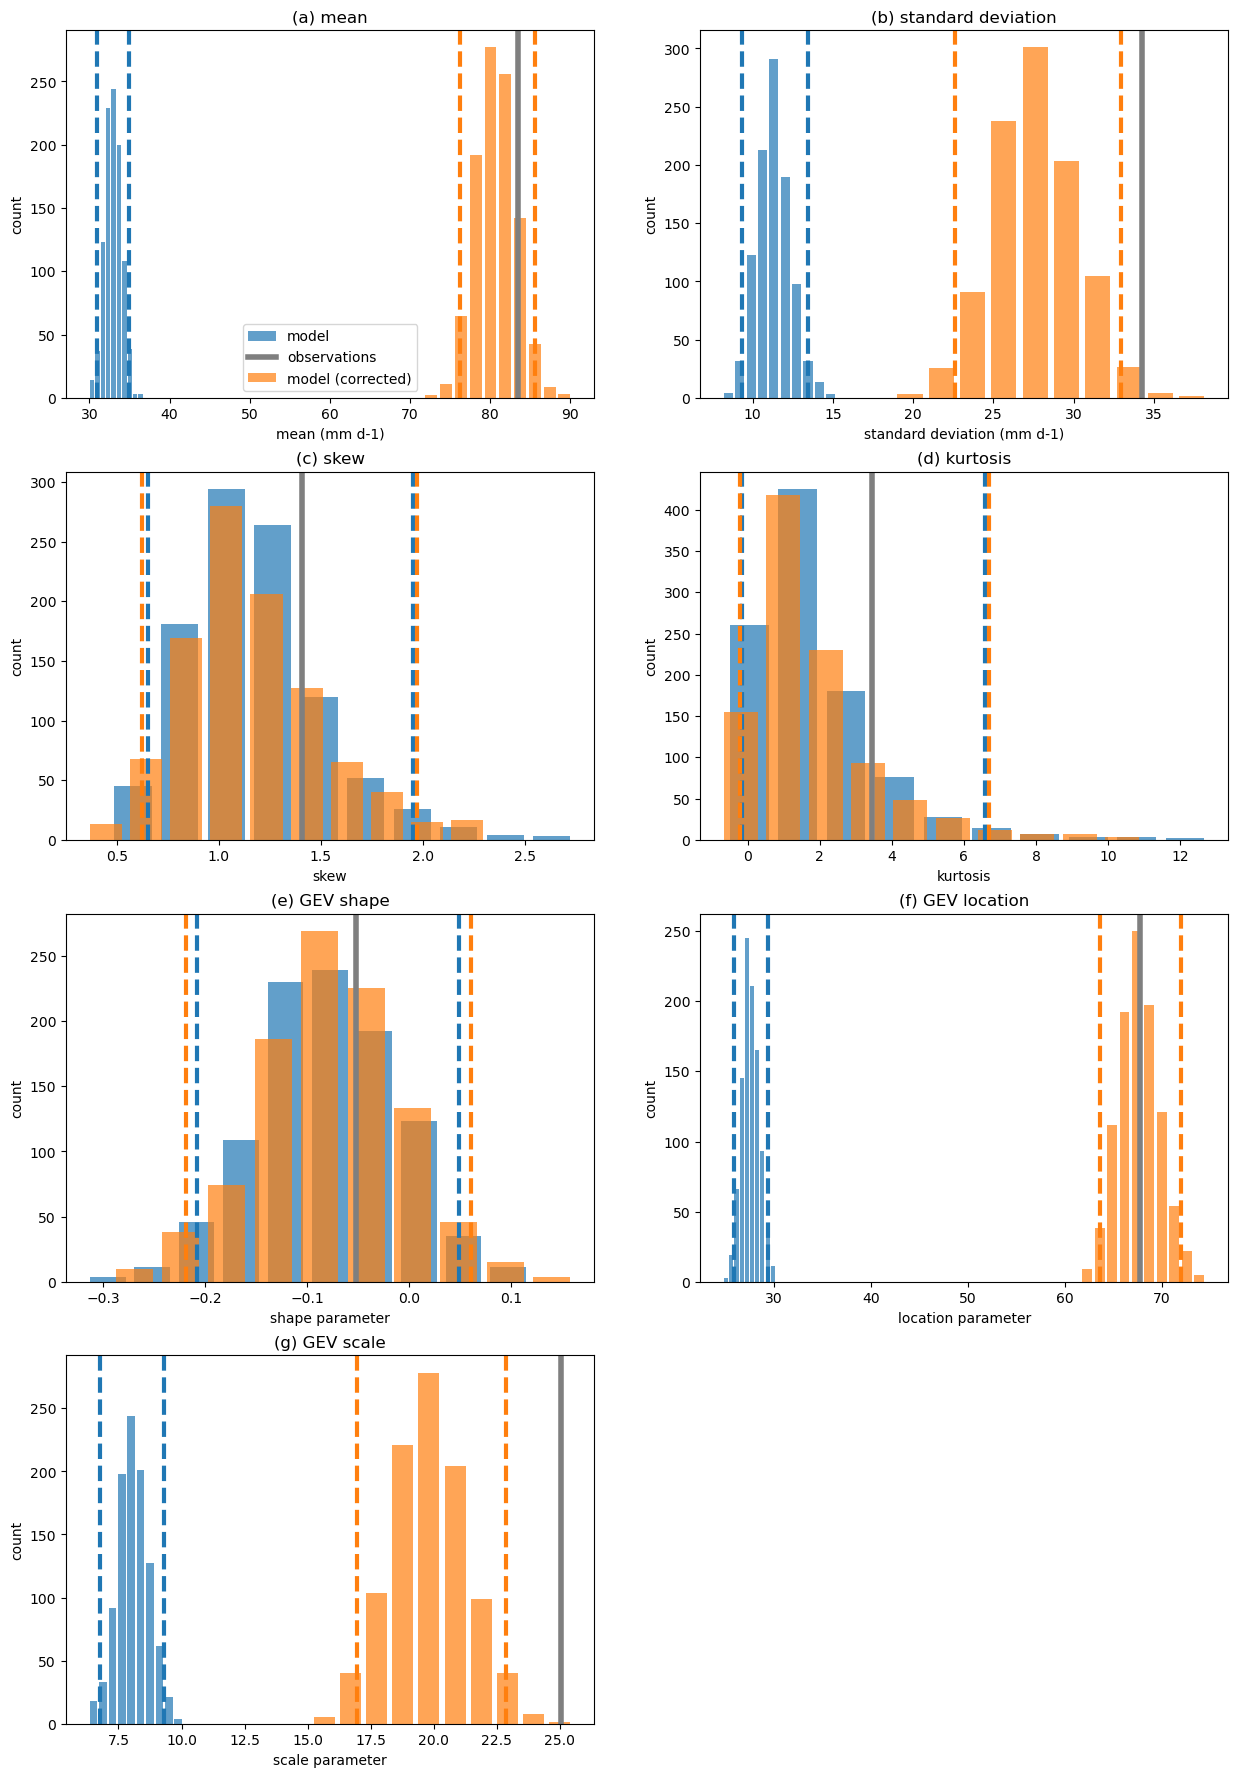

In [41]:
moments.create_plot(
    model_da_indep,
    agcd_ds['pr'],
    da_bc_fcst=model_da_bc,
    outfile='moments_CanESM5.png',
)

In [44]:
agcd_ds

<xarray.Dataset>
Dimensions:     (time: 123)
Coordinates:
  * time        (time) object 1900-12-31 00:00:00 ... 2022-12-31 00:00:00
Data variables:
    pr          (time) float32 67.24 89.49 63.36 75.72 ... 123.1 71.02 131.0
    event_time  (time) <U28 '1900-04-17' '1901-04-25' ... '2022-05-08'
Attributes: (12/33)
    geospatial_lat_min:        -44.525
    geospatial_lat_max:        -9.975
    geospatial_lon_min:        111.975
    geospatial_lon_max:        156.275
    time_coverage_start:       1899-12-31T09:00:00
    date_created:              2017-01-17T22:13:51.976225
    ...                        ...
    licence:                   Data Licence: The grid data files in this AGCD...
    description:               This AGCD data is a snapshot of the operationa...
    date_issued:               2023-05-19 06:19:17
    attribution:               Data should be cited as : Australian Bureau of...
    copyright:                 (C) Copyright Commonwealth of Australia 2023, ...
    history:

In [46]:
similarity_ds = similarity.similarity_tests(model_da_indep, agcd_ds['pr'], 'pr')

In [47]:
print('KS score:', similarity_ds['ks_statistic'].values)
print('KS p-value:', similarity_ds['ks_pval'].values)
print('AD score:', similarity_ds['ad_statistic'].values)
print('AD p-value:', similarity_ds['ad_pval'].values)

KS score: 0.79191273
KS p-value: 0.0
AD score: 410.3345
AD p-value: 0.001


/g/data/xv83/dbi599/miniconda3/envs/unseen2/lib/python3.10/site-packages/xstatstests/scipy.py:246: UserWarning: p-value floored: true value smaller than 0.001
  outputs = func(args, **scipy_kwargs)


In [48]:
similarity_bc_ds = similarity.similarity_tests(model_da_bc, agcd_ds['pr'], 'pr')

In [49]:
print('KS score:', similarity_bc_ds['ks_statistic'].values)
print('KS p-value:', similarity_bc_ds['ks_pval'].values)
print('AD score:', similarity_bc_ds['ad_statistic'].values)
print('AD p-value:', similarity_bc_ds['ad_pval'].values)

KS score: 0.0913398
KS p-value: 0.24527538
AD score: 1.7782886
AD p-value: 0.060016245


## Results

In [50]:
model_da_bc_stacked = model_da_bc.dropna('lead_time').stack({'sample': ['ensemble', 'init_date', 'lead_time']})

In [51]:
print(model_da_bc_stacked)

<xarray.DataArray 'pr' (sample: 10260)>
array([ 48.1209  ,  57.76966 , 109.43264 , ...,  44.724075, 120.262794,
       140.1868  ], dtype=float32)
Coordinates:
    time       (sample) object 1962-01-01 12:00:00 ... 2026-01-01 12:00:00
  * sample     (sample) object MultiIndex
  * ensemble   (sample) int64 0 0 0 0 0 0 0 0 0 0 ... 19 19 19 19 19 19 19 19 19
  * init_date  (sample) object 1961-01-01 00:00:00 ... 2017-01-01 00:00:00
  * lead_time  (sample) int64 1 2 3 4 5 6 7 8 9 1 2 3 ... 8 9 1 2 3 4 5 6 7 8 9
Attributes:
    standard_name:           lwe_precipitation_rate
    units:                   mm d-1
    bias_correction_method:  multiplicative
    bias_correction_period:  1970-01-01-2017-12-31


594 year return period
95% CI: 490-754 years


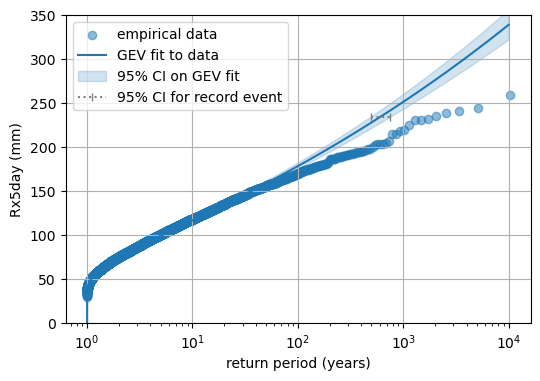

In [55]:
fig = plt.figure(figsize=[6, 4])
ax = fig.add_subplot()
general_utils.plot_gev_return_curve(
    ax,
    model_da_bc_stacked,
    rx5day_max,
    n_bootstraps=100,
    direction="exceedance",
    ylabel='Rx5day (mm)',
    ylim=(0, 350),
)
plt.show()